# **Setup Data**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(url, header=None)
abalone.columns = ["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings",]
abalone.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [ ]:
abalone = abalone.drop('Sex', axis=1)
abalone.head(3)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


# **Analisis Exploratorio**

In [ ]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


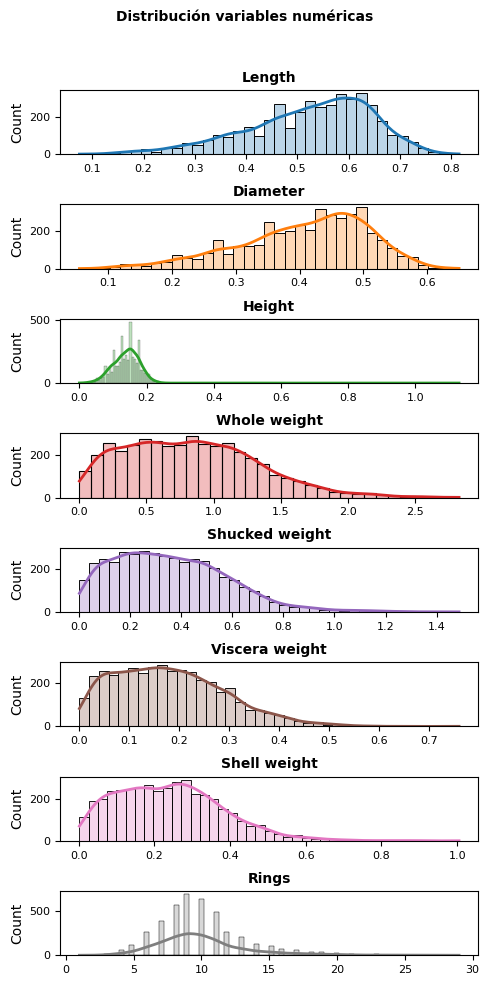

In [ ]:
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(5,10))
axes = axes.flat
data = abalone.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(data):
    sns.histplot(
        data    = abalone,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [ ]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Al observar la distribucion de las variables, se logra identificar una tendencia a ser una distribucion normal en las variables de Length, Diameter, Height y Rings. Mientras que los pesos ("Weight's") distrubuyen normal positivamente.

Sin embargo, nuestra variable de interes "Rings", tiene una distribucion normal estandar mas marcada, para esto la observaremos mas detalladamente.

# **Distribucion Variable Interes "Rings"**

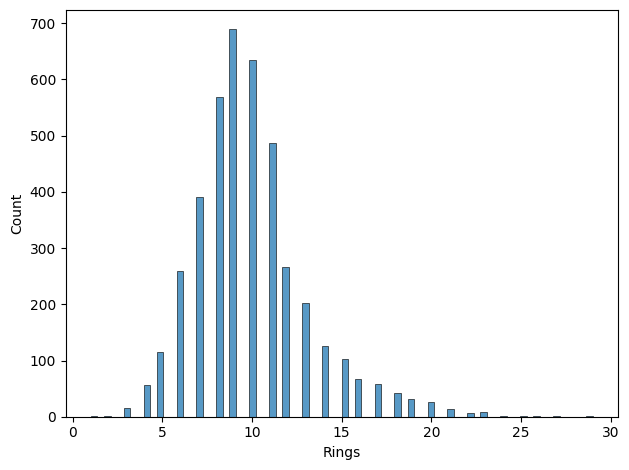

In [ ]:
sns.histplot(data=abalone['Rings'])

plt.tight_layout()
plt.show()

Comparando los datos obtenidos con el metodo Describe(), se observa claramente que la media esta aproximadamente en 10 rings, y que tambien existe una asimetria positiva en los valores de rings mas elevados.

# **Correlacion de las variables**

In [ ]:
correlation = abalone.corr()
correlation['Rings']

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

En cuanto a la correlacion de las variables con respuesto a la Variable Respuesta "Rings", se observa una correlacion moderada en la mayoria de las variables que sobrepasan un valor de 0.5. Exceptuando la variable Shucked Weight, que podria ser una candidata a ser descartada, debido a que es la variable con mas baja correlacion respecto a las demas.

# **Definiendo Distancias**

In [ ]:
X = abalone.drop('Rings', axis=1)
X = X.values
Y = abalone['Rings']
Y = Y.values

#AbulonMeanValues
abulonPoint = np.array([0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831])

In [ ]:
distances = np.linalg.norm(X - abulonPoint, axis=1)
display(distances)

array([0.37424342, 0.72837115, 0.1901846 , ..., 0.42305067, 0.35507533,
       1.32692616])

Para observar algunos datos vecinos con algun punto de interes, se definio los valores promedios de todas las variables para observar que datos estan cercanos al promedio.

# **Determinando vecinos cercanos**

In [ ]:
k = 3

vecinosCercanos = distances.argsort()[:k]
display(vecinosCercanos)

array([2892, 3833, 1599], dtype=int64)

Por ultimo, los datos vecinos que son cercanos a el punto definido anteriormente fueron los siguientes datos:

In [ ]:
display(abalone.iloc[2892])
display(abalone.iloc[3833])
display(abalone.iloc[1599])

Length             0.5300
Diameter           0.4050
Height             0.1500
Whole weight       0.8315
Shucked weight     0.3520
Viscera weight     0.1870
Shell weight       0.2525
Rings             10.0000
Name: 2892, dtype: float64

Length             0.5350
Diameter           0.4100
Height             0.1500
Whole weight       0.8105
Shucked weight     0.3450
Viscera weight     0.1870
Shell weight       0.2400
Rings             11.0000
Name: 3833, dtype: float64

Length             0.5300
Diameter           0.4200
Height             0.1300
Whole weight       0.8365
Shucked weight     0.3745
Viscera weight     0.1670
Shell weight       0.2490
Rings             11.0000
Name: 1599, dtype: float64